Programowanie w Analityce Danych
Praca domowa 4
Zadanie 1
Zbiór: London_merged
Zbiór danych dotyczy bike-sharingu w Londynie.
a)	Przeprowadź regresję liniową, w której zmienną zależną jest kolumna cnt (wyłącz z analiz pierwszą kolumnę).
b)	Z koluny time stamp stwórz kolumnę hour oraz year
c)	Wskaż, które parametry regresji są istotne na poziomie istotności 0,05
d)	Przedstaw korelacje między wszystkimi zmiennymi za pomocą heatmapy.
e)	Podziel dane ze względu na rok, przeprowadź dla każdego z lat osobną analizę regresyjną.


In [105]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv("London_merged.csv",delimiter = ",")
print(df.head(5))
print(df.dtypes)
print(df.shape)

             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  
timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object
(17414, 10)


a)

MAE =  680.3694510999691


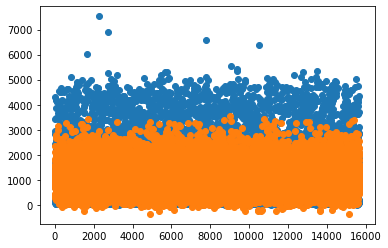

In [124]:
features_names = ['t1', 't2', 'hum', 'wind_speed','weather_code', 'is_holiday', 'is_weekend', 'season']
y = df.cnt
X = df[features_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size = 0.9)
#Cross-validation optimum folds
my_pipeline = make_pipeline(LinearRegression())
my_pipeline.fit(train_X,train_y)
prediction_y = my_pipeline.predict(val_X)
prediction_mae = mean_absolute_error(prediction_y,val_y)
print('MAE = ',prediction_mae)
x_plot = range(val_y.size)
plt.scatter(x_plot, val_y)
plt.scatter(x_plot, prediction_y)


b)

In [104]:
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4


c)

In [68]:
from scipy.stats import pearsonr as r_coef
features_names.extend(['year','hour'])

for name in features_names:
    for second_name in features_names:
        if name != second_name:
            current_correlation = r_coef(df[name],df[second_name])
            if current_correlation[1]<=0.05:
                print(name,' and ',second_name,'are siginifcantly correlated.')

t1  and  t2 are siginifcantly correlated.
t1  and  hum are siginifcantly correlated.
t1  and  wind_speed are siginifcantly correlated.
t1  and  weather_code are siginifcantly correlated.
t1  and  is_holiday are siginifcantly correlated.
t1  and  season are siginifcantly correlated.
t1  and  year are siginifcantly correlated.
t1  and  hour are siginifcantly correlated.
t2  and  t1 are siginifcantly correlated.
t2  and  hum are siginifcantly correlated.
t2  and  wind_speed are siginifcantly correlated.
t2  and  weather_code are siginifcantly correlated.
t2  and  is_holiday are siginifcantly correlated.
t2  and  season are siginifcantly correlated.
t2  and  year are siginifcantly correlated.
t2  and  hour are siginifcantly correlated.
hum  and  t1 are siginifcantly correlated.
hum  and  t2 are siginifcantly correlated.
hum  and  wind_speed are siginifcantly correlated.
hum  and  weather_code are siginifcantly correlated.
hum  and  is_holiday are siginifcantly correlated.
hum  and  is_week

d)

<AxesSubplot:>

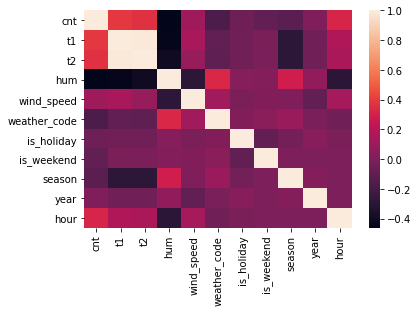

In [88]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)


e)

In [96]:
df_2015 = df.loc[df.year == 2015]
df_2016 = df.loc[df.year == 2016]
df_2017 = df.loc[df.year == 2017]

Rok 2015

MAE =  670.7149418776538


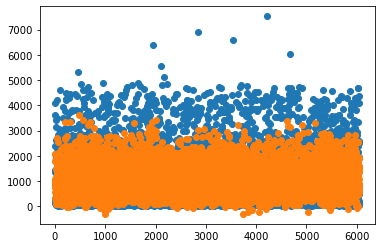

In [121]:
y = df_2015.cnt
X = df_2015[features_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size = 0.7)
#Cross-validation optimum folds
my_pipeline = make_pipeline(LinearRegression())
my_pipeline.fit(train_X,train_y)
prediction_y = my_pipeline.predict(val_X)
prediction_mae = mean_absolute_error(prediction_y,val_y)
print('MAE = ',prediction_mae)
x_plot = range(val_y.size)
plt.scatter(x_plot, val_y)
plt.scatter(x_plot, prediction_y)

Rok 2016

MAE =  694.0161008459969


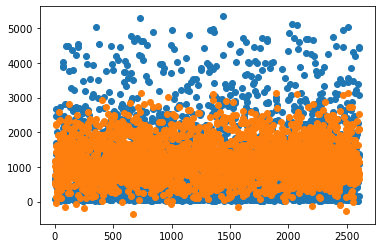

In [116]:
y = df_2016.cnt
X = df_2016[features_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size = 0.3)
#Cross-validation optimum folds
my_pipeline = make_pipeline(LinearRegression())
my_pipeline.fit(train_X,train_y)
prediction_y = my_pipeline.predict(val_X)
prediction_mae = mean_absolute_error(prediction_y,val_y)
print('MAE = ',prediction_mae)
x_plot = range(val_y.size)
plt.scatter(x_plot, val_y)
plt.scatter(x_plot, prediction_y)

Rok 2017

MAE =  363.2733945643226


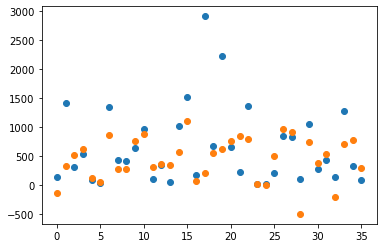

In [118]:
y = df_2017.cnt
X = df_2017[features_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size = 0.5)
#Cross-validation optimum folds
my_pipeline = make_pipeline(LinearRegression())
my_pipeline.fit(train_X,train_y)
prediction_y = my_pipeline.predict(val_X)
prediction_mae = mean_absolute_error(prediction_y,val_y)
print('MAE = ',prediction_mae)
x_plot = range(val_y.size)
plt.scatter(x_plot, val_y)
plt.scatter(x_plot, prediction_y)